## Aprenentatge autmátic - Práctica 1
### Classificació d'imatges emprant SVM

L'objectiu d'aquesta primera pràctica de l'assignatura aprenentatge automàtic es l'obtenció del millor SVM possible, hem obtat per el dataset dels paissatges ja que creim que aprendrem més i que ens servirà per a la realització del TFG.

Com ens indiquen a l'encunciat tenim un conjunt d'imatges en una escala de grisos sense gaire preprocesament, les imatges ja venen separades en el test amb unes 3100 mostres i el train amb unes 1500 imatges, això de primeres ens sorpren una mica ja que tenim mes mostres de test (~2/3) que de train.

El primer que farem sera mirar les nostres dades i extreure informació que ens pugi ser útil.

In [4]:
import matplotlib.pyplot as plt
from matplotlib.image import imread
from skimage.feature import hog
from skimage import data, exposure, feature, io, color
import os
import pandas as pd
import seaborn as sns
import warnings
from sklearn.metrics import accuracy_score , confusion_matrix
import cv2 as cv
from skimage import io, transform


from sklearn.svm import SVC
warnings.filterwarnings('ignore')

## Tractament i exploració de dades

El primer que farem sera mirar quines categories d'imatges tenim i visualitzarem una imatge de cada cateogria.

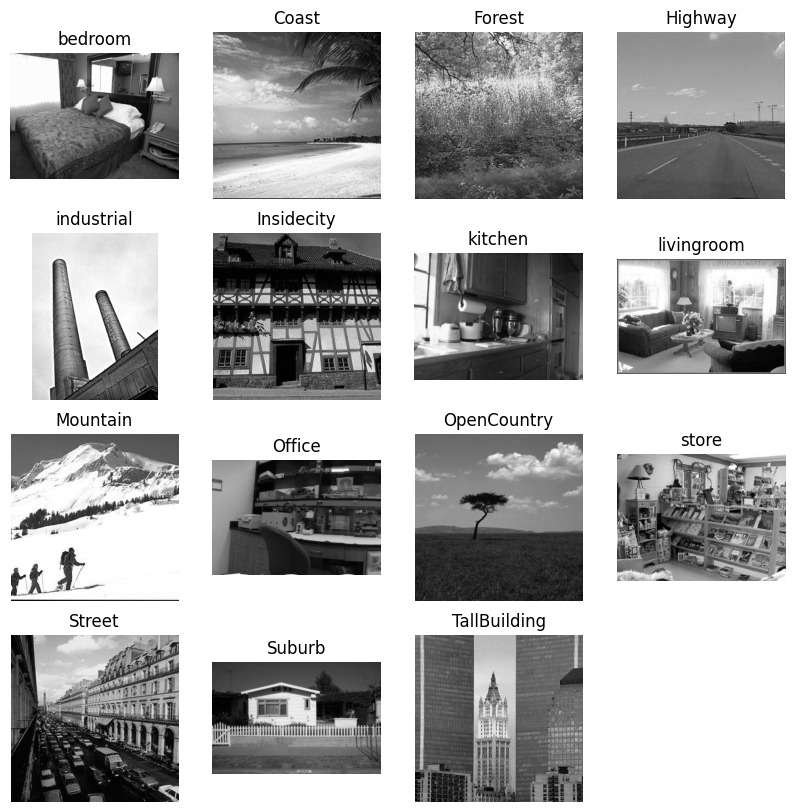

In [6]:
test_path = 'a2/test'
train_path = 'a2/train'

categories = os.listdir(train_path)

def show_categories(categories, train_path):
    plt.figure(figsize=(10, 10))
    for i, category in enumerate(categories):
        image_path = os.path.join(train_path, category)
        image_in_folder = os.listdir(image_path)
        first_image = image_in_folder[0]
        first_image_in_path = os.path.join(image_path, first_image)
        img = imread(first_image_in_path)
        plt.subplot(4, 4, i + 1)
        
        plt.imshow(img, cmap="gray");

        # plt.imshow(img, cmap='gray')
        plt.title(category)
        plt.axis('off')
    plt.show()

show_categories(categories, train_path)

Com podem observar tenim un total de 15 categories difrents i molt variades, desde d'interior d'una tenda com una carretera o una muntaña, el seguent pas que farem sera convertir les imatges a un dataset, per això recorrerem totes les imatges i les tranformarem a un vector unideimensional emprant la funció `flatten()` del paquet `NumPy`, en el nostre cas s'obté un vector unidimensional que conté tots els valors de píxels de la imatge en una seqüència lineal.

In [4]:

def convertImageData(categories, data_path):
    # Definir listas para almacenar datos
    data = []
    labels = []

    # Tamaño de redimensionamiento deseado
    new_size = (75, 75)

    # Recorrer cada categoría
    for category in categories:
        path = os.path.join(data_path, category)
        for img in os.listdir(path):
            img_path = os.path.join(path, img)
            image = io.imread(img_path)
            # Redimensionar la imagen
            resized_image = transform.resize(image, new_size)
            # Aplanar la imagen en un vector unidimensional
            feature_vector = resized_image.flatten()

            # Agregar el vector de características y la etiqueta a las listas de datos
            data.append(feature_vector)
            labels.append(categories.index(category))

    return data, labels

data, labels = convertImageData(categories, train_path)

df = pd.DataFrame(data)
df['label'] = labels

# Mostrar el DataFrame
print(df)

             0         1         2         3         4         5         6  \
0     0.473825  0.485235  0.485450  0.490093  0.478465  0.475926  0.483642   
1     0.858800  0.867976  0.872624  0.877333  0.880264  0.879159  0.880531   
2     0.683753  0.683097  0.739381  0.766519  0.749278  0.797614  0.767978   
3     0.867372  0.861667  0.866668  0.868078  0.866980  0.864473  0.864408   
4     0.660893  0.658289  0.665645  0.659616  0.659545  0.653569  0.654387   
...        ...       ...       ...       ...       ...       ...       ...   
1494  0.526454  0.575988  0.569513  0.552242  0.558829  0.567124  0.574161   
1495  0.289327  0.280210  0.296382  0.310728  0.347635  0.360467  0.363327   
1496  0.323209  0.387147  0.365762  0.110831  0.269727  0.817563  0.537163   
1497  0.379097  0.391104  0.414044  0.427964  0.445158  0.455423  0.466597   
1498  0.288922  0.302618  0.313812  0.321041  0.331191  0.343088  0.374997   

             7         8         9  ...      5616      5617    

Ara que ja tenim totes les imatges a un dataframe amb els valors convertits podem visualitzar quin percentatje de dades tenim de cada categoria, per els gràfics emprarem la llibreria Seaborn. 

label
0     6.671114
1     6.671114
2     6.671114
3     6.671114
4     6.671114
5     6.671114
6     6.671114
8     6.671114
9     6.671114
10    6.671114
11    6.671114
12    6.671114
13    6.671114
14    6.671114
7     6.604403
Name: proportion, dtype: float64


<Axes: xlabel='label', ylabel='count'>

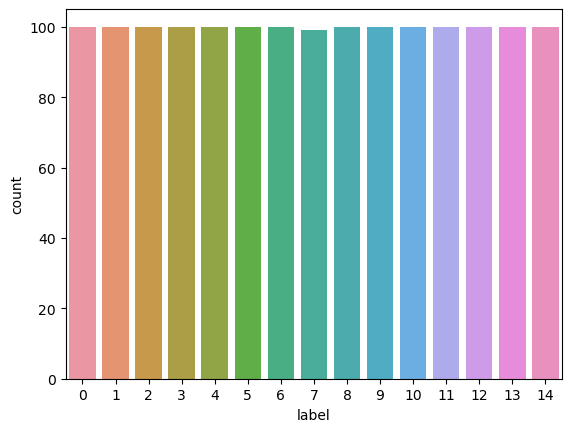

In [5]:
percentage = df['label'].value_counts(normalize=True) * 100
print(percentage)
# Crear el gráfico de barras con los porcentajes
sns.countplot(x="label", data=df)

Com podem observar el percentatje de cada categoria es molt parescut, si no casi identic, això en indica que tenim un porcentatge de dades molt ben balancetjat.

Provarem a fer un SVM basic sense fer cap modificació a les dades i observarem quins resultats ens dona.

In [5]:
svm_basic = SVC(random_state=33, probability=True)

x_train = df.iloc[:,:-1]  
y_train = df.iloc[:,-1]

svm_basic.fit(x_train, y_train) 

KeyboardInterrupt: 

In [ ]:
data, labels = convertImageData(categories, test_path)

y_pred = svm_basic.predict(data) 
# Calculating the accuracy of the model 
accuracy = accuracy_score(y_pred, labels) 
  
# Print the accuracy of the model 
print(f"The model is {accuracy*100}% accurate")

In [ ]:
cf_matrix = confusion_matrix(labels, y_pred)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()    

In [ ]:
image = imread('a2/test/highway/image_0136.jpg')
plt.imshow(image, cmap="gray") 
plt.show() 
img_resize = transform.resize(image,(75,75)) 
l=[img_resize.flatten()] 
probability=svm_basic.predict_proba(l) 
for ind,val in enumerate(categories): 
    print(f'{val} = {probability[0][ind]*100}%') 
print("The predicted image is : "+categories[svm_basic.predict(l)[0]])


In [ ]:
image = imread('test.jpg')

plt.imshow(image, cmap="gray") 
plt.show() 
img_resize = transform.resize(image,(75,75)) 
l=[img_resize.flatten()] 
probability=svm_basic.predict_proba(l) 
for ind,val in enumerate(categories): 
    print(f'{val} = {probability[0][ind]*100}%') 
print("The predicted image is : "+categories[svm_basic.predict(l)[0]])


Ara provarem a fer un preprocesament de les dades per intentar millorar els resultats, per això aplicarem HOG a les imatges i repetirem el procés.

In [3]:
from skimage.feature import hog

def convertImageDataHOG(categories, data_path, dim = (100,100),  flip = False, categoriesToExclude = []):
    # Definir listas para almacenar datos
    data = []
    labels = []

    # HOG parameters
    orientations = 13
    pixels_per_cell = (5, 5)
    cells_per_block = (4, 4)

 
    
    new_categories = [item for item in categories if item not in categoriesToExclude]
    # Recorrer cada categoría
    for category in new_categories:
        path = os.path.join(data_path, category)
        for img in os.listdir(path):
            img_path = os.path.join(path, img)
            image = io.imread(img_path)

            # Redimensionar la imagen
            images = [transform.resize(image, dim)]            
            if(flip): 
                images.append(cv.flip(images[0], flipCode=1))
            
            for img in images: 
                # Aplicar HOG al resized_image
                hog_features = hog(img,
                                   orientations=orientations,
                                   pixels_per_cell=pixels_per_cell,
                                   cells_per_block=cells_per_block,
                                   visualize=False)
                
                # Agregar el vector de características HOG y la etiqueta a las listas de datos
                data.append(hog_features)

                labels.append(categories.index(category))
            

    return data, labels

In [ ]:
dataHOG, labelsHOG = convertImageDataHOG(categories, train_path, flip = True)

dfHOG = pd.DataFrame(dataHOG)
dfHOG['label'] = labelsHOG

# Mostrar el DataFrame
print(dfHOG)

In [47]:
svm_HOG = SVC(random_state=33, probability=True)

x_train_hog = dfHOG.iloc[:,:-1]  
y_train_hog = dfHOG.iloc[:,-1]

svm_HOG.fit(x_train_hog, y_train_hog) 

SVC(probability=True, random_state=33)

In [48]:
dataHOG, labelsHOG = convertImageDataHOG(categories, test_path)

y_pred_hog = svm_HOG.predict(dataHOG) 
# Calculating the accuracy of the model 
accuracy_hog = accuracy_score(y_pred_hog, labelsHOG) 
  
# Print the accuracy of the model 
print(f"The model is {accuracy_hog*100}% accurate")

The model is 66.36515912897822% accurate


In [4]:
def hogTrainAndTest(svm_HOG,data, dim, labels):
    x_train_hog = dfHOG.iloc[:,:-1]  
    y_train_hog = dfHOG.iloc[:,-1]

    svm_HOG.fit(x_train_hog, y_train_hog) 
    print("Model fitted")
    dataHOG, labelsHOG = convertImageDataHOG(categories, test_path, dim)

    y_pred_hog = svm_HOG.predict(dataHOG) 
    # Calculating the accuracy of the model 
    accuracy_hog = accuracy_score(y_pred_hog, labelsHOG) 

    # Print the accuracy of the model 
    print(f"The model is {accuracy_hog*100}% accurate")
    

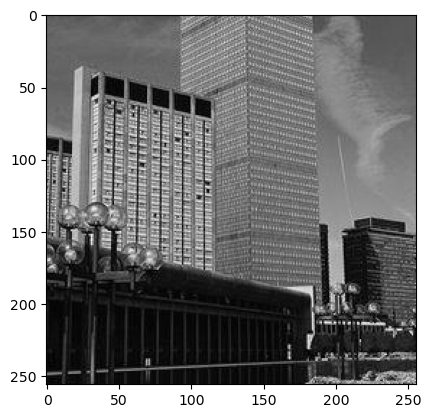

NameError: name 'svm_HOG' is not defined

In [5]:
image = imread('a2/test/tallbuilding/image_0057.jpg')
plt.imshow(image, cmap="gray") 
plt.show() 
img = transform.resize(image, (100,100))          
orientations = 13
pixels_per_cell = (5, 5)
cells_per_block = (4, 4)
img = [hog(img,orientations,pixels_per_cell=pixels_per_cell,cells_per_block=cells_per_block,
                   visualize=False)]


probability=svm_HOG.predict_proba(img) 
for ind,val in enumerate(categories): 
    print(f'{val} = {probability[0][ind]*100}%') 
print("The predicted image is : "+categories[svm_HOG.predict(img)[0]])


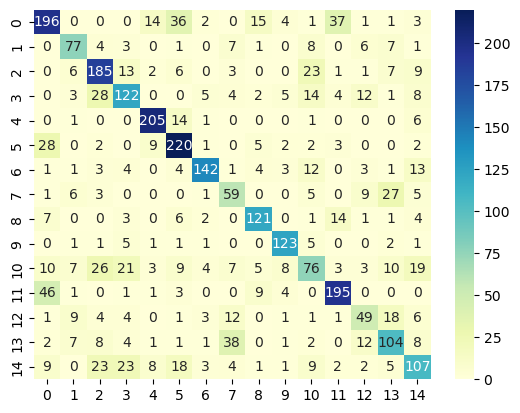

              precision    recall  f1-score   support

 OpenCountry       0.65      0.63      0.64       310
      Office       0.65      0.67      0.66       115
TallBuilding       0.64      0.72      0.68       256
  Insidecity       0.60      0.59      0.59       208
      Forest       0.84      0.90      0.87       228
    Mountain       0.69      0.80      0.74       274
      Street       0.86      0.74      0.79       192
     bedroom       0.44      0.51      0.47       116
     Highway       0.74      0.76      0.75       160
      Suburb       0.81      0.87      0.84       141
  industrial       0.47      0.36      0.41       211
       Coast       0.75      0.75      0.75       260
     kitchen       0.49      0.45      0.47       110
  livingroom       0.57      0.55      0.56       189
       store       0.56      0.50      0.53       215

    accuracy                           0.66      2985
   macro avg       0.65      0.65      0.65      2985
weighted avg       0.66   

In [79]:
cf_matrix = confusion_matrix(labelsHOG, y_pred_hog)
sns.heatmap(cf_matrix, annot=True, fmt='d', cmap='YlGnBu')
plt.show()    

from sklearn.metrics import classification_report

# Calculating the classification report
report = classification_report(labelsHOG, y_pred_hog, target_names=categories)

# Print the classification report
print(report)


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold

# Define the parameter grid for the grid search
param_grid = {'C': [1, 10, 100],
              'gamma': ["auto", "scale"],
              'kernel': ['rbf', 'linear', "poly"]}

# Create the GridSearchCV object
grid_search = GridSearchCV(SVC(random_state=33, probability=True), param_grid, verbose=3, cv=KFold(n_splits=5, random_state=10, shuffle=True))

# Fit the grid search to the data
grid_search.fit(x_train_hog, y_train_hog)

# Print the best parameters and best score
print("Best parameters:", grid_search.best_params_)
print("Best score:", grid_search.best_score_)


In [ ]:
svm_HOG_grid = SVC(C=1.0, gamma="scale", kernel='rbf', random_state=33, probability=True)

svm_HOG_grid.fit(x_train_hog, y_train_hog) 

y_pred_hog = svm_HOG_grid.predict(dataHOG) 
# Calculating the accuracy of the model 
accuracy_hog_grid = accuracy_score(y_pred_hog, labelsHOG) 
  
# Print the accuracy of the model 
print(f"The model is {accuracy_hog_grid*100}% accurate")

In [ ]:
# Load the image
image = imread('test.jpg')
plt.imshow(image, cmap="gray")
plt.show()

# HOG parameters
orientations = 9
pixels_per_cell = (4, 4)
cells_per_block = (1, 1)

# Resize the image
img_resize = transform.resize(image, (150, 150))

# Calculate HOG features
hog_features, hog_image = hog(img_resize,
                              orientations=orientations,
                              pixels_per_cell=pixels_per_cell,
                              cells_per_block=cells_per_block,
                              visualize=True)

# Visualize HOG features
plt.imshow(hog_image, cmap="gray")
plt.show()

# Use the trained SVM model for prediction
probability = svm_HOG.predict_proba([hog_features])

# Show the prediction results
for ind, val in enumerate(categories):
    print(f'{val} = {probability[0][ind] * 100}%')

# Print the predicted image
print("The predicted image is: " + categories[svm_HOG.predict([hog_features])[0]])


----

## Combine hog and lbp


In [8]:
import numpy as np
from skimage.feature import hog, local_binary_pattern
from sklearn.preprocessing import MinMaxScaler

def convertImageDataHOG_LBP(categories, data_path, dim = (100,100),  flip = False, categoriesToExclude = []):
    # Definir listas para almacenar datos
    data = []
    labels = []

    # HOG parameters
    orientations = 13
    pixels_per_cell = (5, 5)
    cells_per_block = (4, 4)
    
    # LBP parameters
    lbp_radius = 4
    lbp_n_points = 8 * lbp_radius
    method = 'uniform'
    scaler = MinMaxScaler(feature_range=(0, 1))

    new_categories = [item for item in categories if item not in categoriesToExclude]
    # Recorrer cada categoría
    for category in new_categories:
        path = os.path.join(data_path, category)
        for img in os.listdir(path):
            img_path = os.path.join(path, img)
            image = io.imread(img_path)

            # Redimensionar la imagen
            images = [transform.resize(image, dim)]            
            if(flip): 
                images.append(cv.flip(images[0], flipCode=1))
            
            for img in images: 
                # Aplicar HOG al resized_image
                hog_features = hog(img,
                                   orientations=orientations,
                                   pixels_per_cell=pixels_per_cell,
                                   cells_per_block=cells_per_block,
                                   visualize=False)
                
                hog_reshape = hog_features.reshape(-1, 1)
                hog_features_normalized = scaler.fit_transform(hog_reshape)
                
                lbp_features = local_binary_pattern(img, lbp_n_points, lbp_radius, method)
                lbp_reshape = lbp_features.reshape(-1, 1)
                lbp_features_normalized = scaler.fit_transform(lbp_reshape)

                # Agregar el vector de características HOG y la etiqueta a las listas de datos
                data.append(np.concatenate([hog_features_normalized.ravel(), lbp_features_normalized.ravel()]))

                labels.append(categories.index(category))
            

    return data, labels 

dataHOG_LBP, labelsHOG_LBP = convertImageDataHOG_LBP(categories, train_path, flip=True)

dfHOG_LBP = pd.DataFrame(dataHOG_LBP)
dfHOG_LBP['label'] = labelsHOG_LBP

# Mostrar el DataFrame
print(dfHOG_LBP)

             0         1         2         3         4         5         6  \
0     0.292602  0.000000  0.000000  0.000000  0.021125  0.018302  0.555966   
1     0.113551  0.095867  0.192633  0.022158  0.000000  0.000000  0.083495   
2     0.050938  0.000000  0.000000  0.000000  0.000000  0.008898  0.028267   
3     0.073744  0.037089  0.185210  0.135710  0.000000  0.000000  0.062621   
4     0.018104  0.000000  0.002798  0.000000  0.000000  0.062635  0.517607   
...        ...       ...       ...       ...       ...       ...       ...   
2993  0.024372  0.000000  0.000584  0.001070  0.000566  0.001892  0.191795   
2994  0.061208  0.004713  0.000000  0.013781  0.001197  0.001674  0.014020   
2995  0.022162  0.005420  0.022365  0.081824  0.018482  0.000000  0.031736   
2996  0.053961  0.000000  0.000000  0.000000  0.000000  0.000000  0.059393   
2997  0.013448  0.000000  0.000000  0.000289  0.024915  0.006538  0.087589   

             7         8         9  ...     70103     70104    

In [9]:
svm_HOG_LBP = SVC(random_state=33, probability=True)

x_train_hog_lbp = dfHOG_LBP.iloc[:,:-1]  
y_train_hog_lbp = dfHOG_LBP.iloc[:,-1]

svm_HOG_LBP.fit(x_train_hog_lbp, y_train_hog_lbp) 

SVC(probability=True, random_state=33)

In [10]:
dataHOG_LBP_test, labelsHOG_LBP_test = convertImageDataHOG_LBP(categories, test_path)

y_pred_hog_lbp = svm_HOG_LBP.predict(dataHOG_LBP_test) 
# Calculating the accuracy of the model 
accuracy_hog_lbp = accuracy_score(y_pred_hog_lbp, labelsHOG_LBP_test) 
  
# Print the accuracy of the model 
print(f"The model is {accuracy_hog_lbp*100}% accurate")

The model is 65.25963149078727% accurate


In [15]:
from sklearn.model_selection import ValidationCurveDisplay
from sklearn.model_selection import validation_curve

train_scores, test_scores = validation_curve(
    svm_HOG_LBP,
    dataHOG_LBP_test, 
    labelsHOG_LBP_test, 
    param_range=[1.0],
    param_name="gamma", 
    scoring="accuracy",
    n_jobs=-1
)

display = ValidationCurveDisplay(param_range, train_scores, test_scores, xlabel="gamma")
display.plot()
plt.show()

KeyboardInterrupt: 

 # Experimentació
 


 ### Data Augmentation (flip):
 To try: o-13, 100x100 ppc= 5, flip = true, cpb = 4 (62,71 amb 75x75) i la meitat de dades

Proves:

In [10]:
dataHOG, labelsHOG = convertImageDataHOG(categories, train_path, (75,75), flip = False)

dfHOG = pd.DataFrame(dataHOG)
dfHOG['label'] = labelsHOG

# Mostrar el DataFrame
print(dfHOG.shape)

(1499, 29953)


In [13]:
svm_HOG = SVC(random_state=33, probability=True)

hogTrainAndTest(svm_HOG,dataHOG, (75,75), labelsHOG)

Model fitted
The model is 62.68006700167504% accurate


Veient com el que mes es confon son les habitacions amb els menjadors, nam a provar d'eliminar la classe habitació:

In [5]:

dataHOG, labelsHOG = convertImageDataHOG(categories, 
                                         train_path,(75,75),
                                         categoriesToExclude = ["bedroom"],
                                         flip = False)

dfHOG = pd.DataFrame(dataHOG)
dfHOG['label'] = labelsHOG

# Mostrar el DataFrame
print(dfHOG.shape)

(1400, 29953)


In [6]:
svm_HOG = SVC(random_state=33, probability=True)

hogTrainAndTest(svm_HOG,dataHOG,(75,75), labelsHOG)

Model fitted
The model is 62.043551088777214% accurate


Un altre cas de conflicte seria la categoria de les cuines, nam a veure a mem si les llevam:

In [11]:

dataHOG, labelsHOG = convertImageDataHOG(categories,
                                         train_path,
                                         (75,75),
                                         categoriesToExclude = ["kitchen"],
                                         flip = False)

dfHOG = pd.DataFrame(dataHOG)
dfHOG['label'] = labelsHOG

# Mostrar el DataFrame
print(dfHOG.shape)

(1399, 29953)


In [12]:
svm_HOG = SVC(random_state=33, probability=True)

hogTrainAndTest(svm_HOG,dataHOG,(75,75), labelsHOG)

Model fitted
The model is 61.97654941373534% accurate


Combinant el fet d'eliminar els casos conflictius:

In [13]:

dataHOG, labelsHOG = convertImageDataHOG(categories,
                                         train_path,
                                         (75,75),
                                          categoriesToExclude = ["bedroom","kitchen"],
                                         flip = False)

dfHOG = pd.DataFrame(dataHOG)
dfHOG['label'] = labelsHOG

# Mostrar el DataFrame
print(dfHOG.shape)

(1300, 29953)


In [14]:
svm_HOG = SVC(random_state=33, probability=True)

hogTrainAndTest(svm_HOG,dataHOG,(75,75), labelsHOG)

Model fitted
The model is 61.50753768844221% accurate
